## Assignment 5 - Deadline: Nov 13, 2024, Wed 11pm

#### DSAI 510 Fall 2024

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.boun.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [1]:
# Run this cell first

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import itertools
from sklearn.linear_model import Ridge

# Set the display option to show all rows scrolling with a slider
#pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if they ask "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

## Problem 1 (10 pts)

Create the dataframe by running the cell below

In [2]:
data = {'A': [1, 2, 3, 4, 5], 'B': [2.1, 4.2, 5.6, 8, 11]}
df = pd.DataFrame(data)
#df

**Part (a)**

By defining X and Y and then using the formula
$$\beta = (X^T X)^{-1} X^T Y $$
compute the $\beta$ coefficients. You can use `linalg` function from `numpy` library to multiple the matrices. 

In [3]:
# Break your computations into multiple cells 

# Define X and Y

X = df["A"]

# Add constant terms here on X
X = sm.add_constant(X)
Y = df['B']

In [4]:


XtX = X.T @ X

XtX_inv = np.linalg.inv(XtX)

XtY = X.T @ Y

beta = XtX_inv @ XtY

print(beta)

[-0.3   2.16]


**Part (b)** 

Use `statsmodels` or any other library to do the regression in Python. The $\beta$'s you found here should be equal to or close to the ones you found in part (a). 

In [5]:
# Define X and Y for regression
X = df['A']
Y = df['B']

# Add a constant to X for the intercept term
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the beta coefficients
beta = model.params
print("Beta coefficients:\n", beta)

Beta coefficients:
 const   -0.30
A        2.16
dtype: float64


## Problem 2 (30 pts)

A chemical substance emits light at two distinct but close wavelengths. The mean of the wavelengths are given by $\lambda_1$ and $\lambda_2$ and the spectrum of the emitted light is distributed in wavelength around these means as a Gaussian distribution. For example, if $\lambda_1=400$ and $\lambda_2=405$, 

$$ \epsilon(\lambda) = \exp \left[-\frac{1}{10} (\lambda-405)^2\right] +\exp \left[-\frac{1}{10} (\lambda-400)^2\right],$$
which is plotted below.

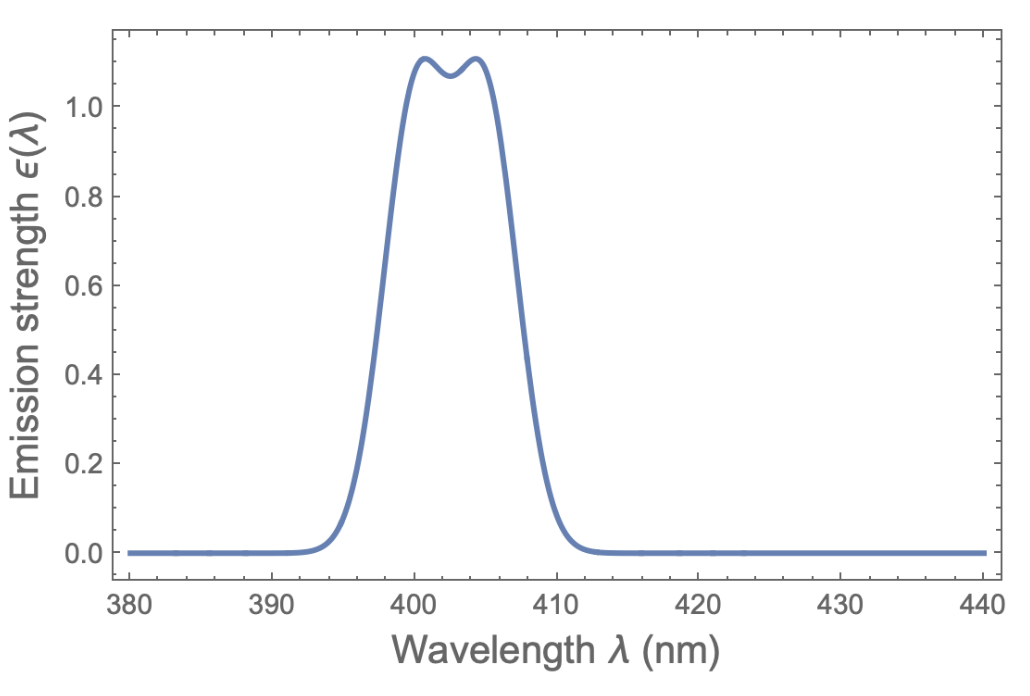

In the plot above, we see superposition of two Gaussians. Since their wavelengths are very close, they overlap and 
create a large bell-shaped curve with a drop in the middle. By looking at this plot, we can't see the _exact_ locations of the two means $\lambda_1$ and $\lambda_2$. 

The formula and plot above were just an example. In the cell below, the data given belongs to a spectrum where we don't know $\lambda_1$ and $\lambda_2$, but we know the spectrum is given by two Gaussians as such

$$ \epsilon(\lambda) = \exp \left[-\frac{1}{10} (\lambda-\lambda_1)^2\right] +\exp \left[-\frac{1}{10} (\lambda-\lambda_2)^2\right].$$

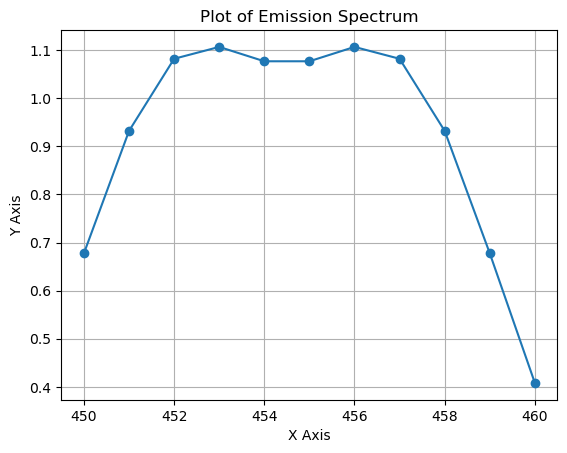

In [6]:
# This is the spectrum data
data = np.array([[450, 0.677767], [451, 0.932161], [452, 1.08208], 
                 [453, 1.10673], [454, 1.07689], [455, 1.07689], [456, 1.10673], 
                 [457,1.08208], [458, 0.932161], [459, 0.677767], [460, 0.408231]])

# suppress scientific form to display numbers in fractional form
np.set_printoptions(suppress=True)

#print(data)

# Plotting
x = data[:, 0]
y = data[:, 1]


plt.plot(x, y, marker='o')  # 'o' is for circle markers
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Plot of Emission Spectrum')
plt.grid(True)  
plt.show()

Your task is to do linear regression by using Gaussian base functions to find the two characteristic frequecies $\lambda_1$ and $\lambda_2$ within the spectrum of which data is given in the cell below. 

**Part (a)** 

Define a function `GaussianReg(lambda1,lambda2)`. It takes two arguments, for example, `lambda1=300` and `lambda1=350`, then performs linear regression of the form
$$ y = \beta_0 + \beta_1  \exp \left[-\frac{1}{10} (\lambda-300)^2\right] + \beta_2  \exp \left[-\frac{1}{10} (\lambda-350)^2\right].$$
If for example, `lambda1=350` and `lambda1=400`, then performs linear regression of the form
$$ y = \beta_0 + \beta_1  \exp \left[-\frac{1}{10} (\lambda-350)^2\right] + \beta_2  \exp \left[-\frac{1}{10} (\lambda-400)^2\right].$$


Then this function `
GaussianReg()` returns the $R^2$ value of this linear regression. (Here we're not interested in the $\beta$'s, rather, we're interested in the particular pair $(\lambda_1,\lambda_2)$ that would model the data well, so we use the metric $R^2$ to find these two values.)

In [7]:
# Define your GaussianReg() function here

def GaussianReg(lambda1,lambda2):
    # do the linear regression for the specific values of lambda1 and lambda2
    # for the data x and y created above.
    X = np.column_stack([
        np.ones(len(x)),  # Intercept term
        np.exp(- (1/10) * (x - lambda1) ** 2),
        np.exp(- (1/10) * (x - lambda2) ** 2)
    ])

    # Fit the model
    model = sm.OLS(y, X).fit()

    # Calculate R^2
    R2 = model.rsquared

    return R2  # return R2 of this linear regression

**Part (b)** 

- Create two nested for loops for $\lambda_1$ and $\lambda_2$. The for loops will iterate over all integer values of lambda1 and lambda2 in the interval [450,460] by taking a different ($\lambda_1$,$\lambda_2$) set in each iteration. Call the `GaussianReg(lambda1,lambda2)` function in each iteration
- `GaussianReg(lambda1,lambda2)` returns a $R^2$ value; append the three numbers (lambda1, lambda2, R2) to the list `R2values` in each iteration. 
- Convert the R2values list into a numpy array. At the end, R2values will have three columns (lambda1, lambda2, R2) and 100 rows (10  values for $\lambda_1$ times 10 values for $\lambda_1$ = 100).

In [9]:
R2values = []; # create an empty list

for lambda1 in range(450, 461):
    for lambda2 in range(450, 461):
        R2values.append((lambda1, lambda2, GaussianReg(lambda1, lambda2)))

    # Do regression by calling GaussianReg(lambda1,lambda2)
    # append (lambda1, lambda2, R2) to the list R2values 

# R2values is a list; turn it into an array of 100x3.
R2values = np.array(R2values)
#print(R2values)

**Part (c)** 
 
- Find the best fit by finding the row in `R2values` where $R^2$ is maximum. Print the corresponding $\lambda_1$ and $\lambda_2$ values that maximizes $R^2$.  
- Do these $\lambda_1$ and $\lambda_2$ you found from the linear regression make sense when you look at the plot with the plot label "Plot of Emission Spectrum" above?

In [10]:
R2values = pd.DataFrame(R2values)

R2values.columns=["lambda1", "lambda2", "R_square"]

R2values.sort_values(by="R_square").iloc[len(R2values) - 1]

# The below values are around peaks on the emission spctrum.

lambda1     452.0
lambda2     457.0
R_square      1.0
Name: 29, dtype: float64

## Problem 3 (20 pts)

Use the approach from Problem 2 (I don't mean exactly the same functions you defined, but the approach in general) to solve this problem:

`data2` includes (x,z) pairs of a mixture of two exponential decay functions in the form
$$f(x)=e^{-a x} + e^{-b x} $$

For $a$ and $b$ are integers in the interval [1,10], find the (a,b) pair that makes the model f(x) fit the `data2` the best.

(Make sure you don't mistakenly use the varible `data` variable; it's `data2` here.)



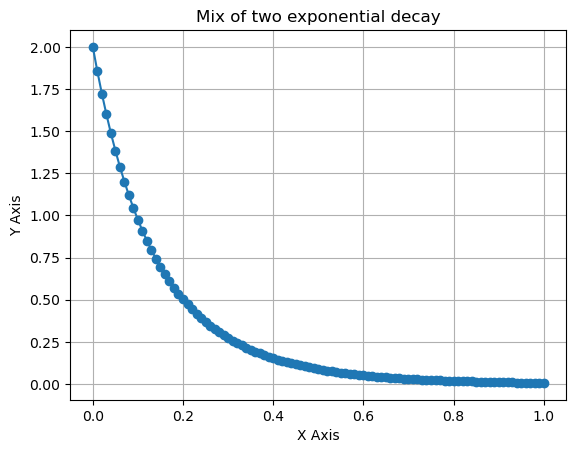

In [11]:
# Run this cell
data2 = np.array([[0., 2.], [0.01, 1.85607], [0.02, 1.72357], [0.03, 1.60153], [0.04, 
  1.48905], [0.05, 1.38533], [0.06, 1.28963], [0.07, 1.20127], [0.08, 
  1.11965], [0.09, 1.0442], [0.1, 0.97441], [0.11, 0.909821], [0.12, 
  0.850006], [0.13, 0.794578], [0.14, 0.743182], [0.15, 
  0.695497], [0.16, 0.651225], [0.17, 0.610098], [0.18, 
  0.571869], [0.19, 0.53631], [0.2, 0.503215], [0.21, 
  0.472394], [0.22, 0.443674], [0.23, 0.416896], [0.24, 
  0.391912], [0.25, 0.36859], [0.26, 0.346805], [0.27, 
  0.326446], [0.28, 0.307407], [0.29, 0.289594], [0.3, 
  0.272917], [0.31, 0.257297], [0.32, 0.242659], [0.33, 
  0.228933], [0.34, 0.216057], [0.35, 0.203971], [0.36, 
  0.192623], [0.37, 0.181961], [0.38, 0.171939], [0.39, 
  0.162516], [0.4, 0.153651], [0.41, 0.145308], [0.42, 
  0.137452], [0.43, 0.130053], [0.44, 0.12308], [0.45, 
  0.116508], [0.46, 0.110311], [0.47, 0.104464], [0.48, 
  0.0989477], [0.49, 0.0937402], [0.5, 0.0888229], [0.51, 
  0.0841784], [0.52, 0.0797901], [0.53, 0.0756428], [0.54, 
  0.0717221], [0.55, 0.0680146], [0.56, 0.0645079], [0.57, 
  0.0611903], [0.58, 0.0580508], [0.59, 0.0550792], [0.6, 
  0.0522658], [0.61, 0.0496018], [0.62, 0.0470786], [0.63, 
  0.0446884], [0.64, 0.0424238], [0.65, 0.0402776], [0.66, 
  0.0382435], [0.67, 0.0363153], [0.68, 0.034487], [0.69, 
  0.0327534], [0.7, 0.0311093], [0.71, 0.0295497], [0.72, 
  0.0280703], [0.73, 0.0266667], [0.74, 0.0253348], [0.75, 
  0.0240708], [0.76, 0.0228712], [0.77, 0.0217326], [0.78, 
  0.0206516], [0.79, 0.0196254], [0.8, 0.0186511], [0.81, 
  0.0177259], [0.82, 0.0168473], [0.83, 0.0160129], [0.84, 
  0.0152204], [0.85, 0.0144677], [0.86, 0.0137527], [0.87, 
  0.0130734], [0.88, 0.0124281], [0.89, 0.011815], [0.9, 
  0.0112324], [0.91, 0.0106789], [0.92, 0.0101529], [0.93, 
  0.00965303], [0.94, 0.009178], [0.95, 0.00872655], [0.96, 
  0.00829748], [0.97, 0.00788966], [0.98, 0.00750203], [0.99, 
  0.00713358], [1., 0.00678335]])

# Plotting
x = data2[:, 0]
y = data2[:, 1]

plt.plot(x, y, marker='o')  # 'o' is for circle markers
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Mix of two exponential decay')
plt.grid(True)  
plt.show()

In [13]:
# your soluion here

def Regression(a,b):
    # do the linear regression for the specific values of a and b
    # for the data x and y created above.
    X = np.column_stack([
        np.ones(len(x)),  # Intercept term
        np.exp(-a * x),
        np.exp(-b * x)
    ])

    # Fit the model
    model = sm.OLS(y, X).fit()

    # Calculate R^2
    R2 = model.rsquared

    return R2  # return R2 of this linear regression

In [14]:
R2values2 = []; # create an empty list

for a in range(1, 11):
    for b in range(1, 11):
        R2values2.append((a, b, Regression(a, b)))

    # Do regression by calling GaussianReg(a,b)
    # append (a, b, R2) to the list R2values2

# R2values is a list; turn it into an array of 100x3.
R2values2 = np.array(R2values2)
#print(R2values2)

In [22]:
R2values2 = pd.DataFrame(R2values2)

R2values2.columns=["a", "b", "R_square"]

R2values2.sort_values(by="R_square").iloc[len(R2values2) - 1]

# Here R2 = 1 means the model overfitted. We need check for VIF ([multi]colinearity), or do some regularization

a            5.0
b           10.0
R_square     1.0
Name: 49, dtype: float64

## Problem 4 - Housing dataset (20 pts)

- **Part (a)** Load the housing dataset. By using the `statsmodel` library, perform a linear regression of 'SalePrice' on the variable 'GarageArea'. The $R^2$ you will find will be less than 0.4.

- **Part (b)** Add some more variables from 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch' and redo the linear regression until the adjusted $R^2$ comes out larger than 0.5. (Here you're not adding all, just choose some until adjusted $R^2$>0.5.)

- **Part (c)** Perform a linear regression of 'SalePrice' on all of these variables at the same time (i.e., use all of them, not some of them) 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'. Calculate adjusted $R^2$.

- **Part (d)** Look at the output table. Remove the variables that has no effect on 'SalePrice', and then redo the linear regression. Note down the variables you removed.

In [16]:
houses = pd.read_csv('../Assignment-4/house-prices/train.csv')

print("Number of duplicate records in 'houses':",houses.duplicated().sum()  )

quantitative = [f for f in houses.columns if houses.dtypes[f] != 'object']
qualitative = [f for f in houses.columns if houses.dtypes[f] == 'object']
#print("Quantitative columns :","\n",quantitative,"\n\n\n","Qualitative columns :","\n", qualitative)


Number of duplicate records in 'houses': 0


In [17]:
# Part (a)

X = houses[['GarageArea']]
X = sm.add_constant(X)  # Add intercept terms
y = houses['SalePrice']

# Fit the model
model = sm.OLS(y, X).fit()

print(model.rsquared)

0.3886667590318186


In [18]:
# Part (b)

# I choose the next field with a method inspired from forward subset selection
# I listed all possible subsets containing "GarageArea" and train the model for each subset
# search for first result passes 0.5

fields = [
    'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', 
    '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch' 
]

element = "GarageArea"

subsets_with_element = [list(subset) for r in range(1, len(fields) + 1)
                        for subset in itertools.combinations(fields, r)
                        if element in subset]

threshold = 0.5
for subset in subsets_with_element:

    X = houses[subset]
    X = sm.add_constant(X)  # Add intercept terms
    y = houses['SalePrice']

    # Fit the model
    model = sm.OLS(y, X).fit()
    if model.rsquared_adj > threshold:
        threshold = model.rsquared_adj
        print(subset, threshold)

        if threshold > 0.5:
            break

# Here the field that causing the R2 value to pass the threshold -> TotalBsmtSF

['TotalBsmtSF', 'GarageArea'] 0.5140696278363066


In [19]:
# Part(c)


X = houses[fields]
X = sm.add_constant(X)  # Add intercept terms
y = houses['SalePrice']

# Fit the model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     223.1
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          3.42e-302
Time:                        21:43:36   Log-Likelihood:                -17820.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1448   BIC:                         3.573e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.282e+06   1.45e+05    -15.784

In [20]:
# Part(d)

removed_fields = [
    "3SsnPorch", # t-value = 0.533 ( bkz. p value also )
    "BsmtUnfSF", # t-value was -1.7 ( bkz. p value also )
]

for i in removed_fields:
    if i in fields:
        fields.remove(i)

X = houses[fields]
X = sm.add_constant(X)  # Add intercept terms
y = houses['SalePrice']

# Fit the model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     272.0
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          6.95e-304
Time:                        21:43:40   Log-Likelihood:                -17822.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1450   BIC:                         3.572e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.27e+06   1.44e+05    -15.727

## Problem 5 - More Housing data (20 pts)

- **Part (a)** Create a new dataframe `houses2` with the columns 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch' and 'SalePrice' from the `houses` dataframe.
- **Part (b)** Check the correlation matrix with `houses2.corr()` and identify the pair that has the maximum correlation; let's call these featureA and featureB.
- **Part (c)** A linear regression model may suffer from collinearity. Perform linear regression for SalePrice by using all features except featureA. Perform linear regression again by using all features except featureB. In both cases, keep all other variables included in the model.
- **Part (d)** Now you've three models with: (i) All variables, (ii) All varibles except featureA and (iii) All varibles except featureB. Compare the adjusted $R^2$'s and report which one is the best performing model.

In [23]:
# Part (a)

fields = [
    'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 
    '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', 'SalePrice']

houses2 = houses[fields]

In [24]:
# Part (b)

max = houses2.corr()["LotArea"]["YearBuilt"]

# Finds max value in the corrolation matrix and corresponding features
for i in range(len(fields)):
    for j in range(i):
        if houses2.corr()[fields[i]][fields[j]] > max:
            max, featureA, featureB = houses2.corr()[fields[i]][fields[j]], fields[i], fields[j]

print(max, featureA, featureB)

0.8195299750050339 1stFlrSF TotalBsmtSF


In [25]:
# Linear Regression with all fields

X = houses2[[
    'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 
    '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch']]
X = sm.add_constant(X)  # Add intercept terms
y = houses2['SalePrice']

# Fit the model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     272.0
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          6.95e-304
Time:                        21:46:34   Log-Likelihood:                -17822.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1450   BIC:                         3.572e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.27e+06   1.44e+05    -15.727

In [26]:
# Part(c)

fields1 = [
    'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch'
]

fields2 = [
    'LotArea', 'YearBuilt', 'YearRemodAdd', 
    '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch']

In [27]:
# Linear Regression without "1stFlrSF" column

X1 = houses2[fields1]
X1 = sm.add_constant(X1)  # Add intercept terms
y1 = houses2['SalePrice']

# Fit the model
model1 = sm.OLS(y1, X1).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     287.9
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          4.23e-293
Time:                        21:46:39   Log-Likelihood:                -17850.
No. Observations:                1460   AIC:                         3.572e+04
Df Residuals:                    1451   BIC:                         3.577e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.17e+06   1.46e+05    -14.819

In [28]:
# Linear Regression without "TotalBsmtSF" column

X2 = houses2[fields2]
X2 = sm.add_constant(X2)  # Add intercept terms
y2 = houses2['SalePrice']

# Fit the model
model2 = sm.OLS(y2, X2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     299.8
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          6.42e-301
Time:                        21:46:41   Log-Likelihood:                -17832.
No. Observations:                1460   AIC:                         3.568e+04
Df Residuals:                    1451   BIC:                         3.573e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.378e+06   1.43e+05    -16.606

In [29]:
# Part (d)

# In terms of R2, both field added version has better performance

## Problem 6 - Even More Housing Data (20 pts)

- **Part (a)** Perform two linear regressions, first as **SalePrice** ~ **YearBuilt** and then **SalePrice** ~ **YearBuilt** + **YearBuilt**$^2$ and create residuals plots for both case.
- **Part (b)**  Which model do you prefer? Discuss from the perspective of both adjusted $R^2$ and residual plots.
- **Part (c)**  Make a scatterplot for the data with the axes SalePrice (y-axis) vs YearBuilt (x-axis). On the same plot, plot the model polynomial model (a curve) **SalePrice** ~ **YearBuilt** + **YearBuilt**$^2$ so that you can see how well this curve approximates the data.

In [30]:
# Part (a)


### 1
X1 = houses2[['YearBuilt']]
X1 = sm.add_constant(X1)  # Add intercept terms
y1 = houses2['SalePrice']

# Fit the model
model1 = sm.OLS(y1, X1).fit()

print(model1.summary())

# Predicted values
X_pred1 = model1.predict(X1)
residuals1 = y1 - X_pred1


### 2
houses2["year_squared"] = houses2[['YearBuilt']] ** 2
X2 = houses2[['YearBuilt']] + houses2["year_squared"]
X2 = sm.add_constant(houses2[['YearBuilt', 'year_squared']])  # Add intercept terms
y2 = houses2['SalePrice']

# Fit the model
model2 = sm.OLS(y2, X2).fit()

print(model2.summary())

# Predicted values
X_pred2 = model2.predict(X2)
residuals2 = y2 - X_pred2

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          2.99e-103
Time:                        21:46:53   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.0

/var/folders/ld/m60xnjf52cndhf07bcb4br040000gn/T/ipykernel_34034/3873165136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses2["year_squared"] = houses2[['YearBuilt']] ** 2


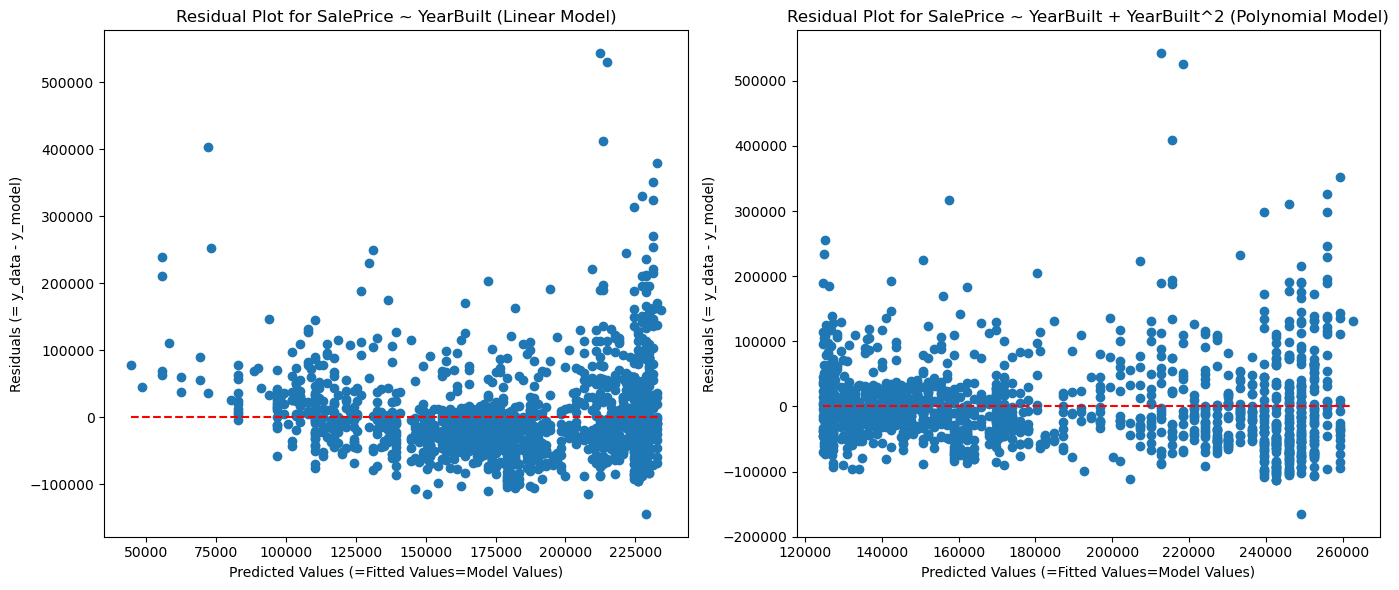

In [31]:
# Plot residuals for both models
plt.figure(figsize=(14, 6))

# Create a residual plot
plt.subplot(1, 2, 1)
plt.scatter(X_pred1, residuals1)
plt.hlines(y=0, xmin=X_pred1.min(), xmax=X_pred1.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values (=Fitted Values=Model Values)')
plt.ylabel('Residuals (= y_data - y_model)')
plt.title('Residual Plot for SalePrice ~ YearBuilt (Linear Model)')

# Create a residual plot
plt.subplot(1, 2, 2)
plt.scatter(X_pred2, residuals2)
plt.hlines(y=0, xmin=X_pred2.min(), xmax=X_pred2.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values (=Fitted Values=Model Values)')
plt.ylabel('Residuals (= y_data - y_model)')
plt.title('Residual Plot for SalePrice ~ YearBuilt + YearBuilt^2 (Polynomial Model)')

plt.tight_layout()
plt.show()

In [ ]:
## Part (b)

# In terms of R2_adj model 2 has better. Also it is easier to see the data on the 2. plot where data point are distinguished better

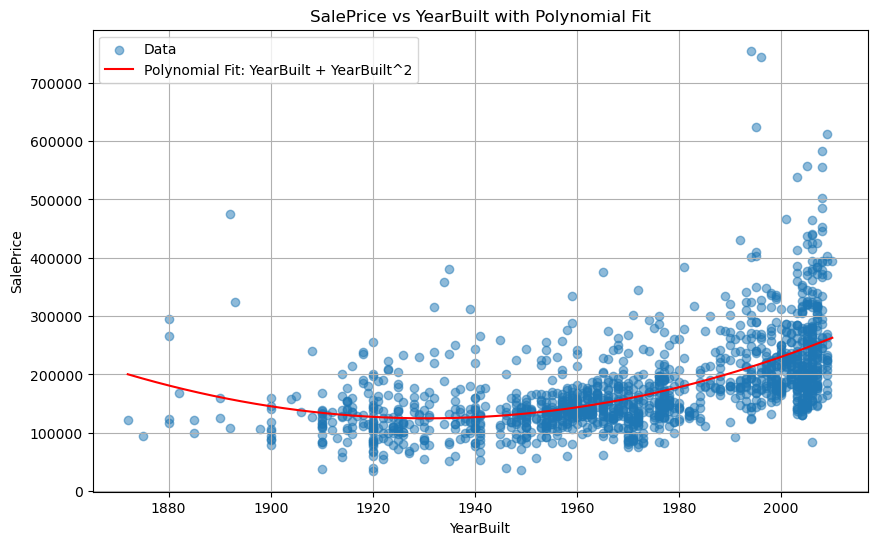

In [32]:
# Part (c)

plt.figure(figsize=(10, 6))

# Scatterplot of data
plt.scatter(houses2['YearBuilt'], houses2['SalePrice'], alpha=0.5, label='Data')

# Plotting the polynomial model
year_range = np.linspace(houses2['YearBuilt'].min(), houses2['YearBuilt'].max(), 200)
year_range_squared = year_range ** 2
X_poly =  np.column_stack([
                            np.ones(len(year_range)), 
                            year_range,
                            year_range_squared
                            ])

y_pred = model2.predict(X_poly)

plt.plot(year_range, y_pred, color='red', label='Polynomial Fit: YearBuilt + YearBuilt^2')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('SalePrice vs YearBuilt with Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()

## Problem 7 - Small datasets and $R^2$ (20 pts)

Let's assume `IQ` (target) does not depend on `Shoe Size` (predictor) at all. To simulate this situation, we can create a sample dataset where the two columns have no correlation, i.e., two columns are random numbers.

**Part (a)**
Define a function `fnc(num)` that does the following.
1. It takes the argument 'num' and create 'num' number of random x and y values between [1,100] with np.random.uniform(). For example, if num=100, it will create 100 random numbers for x and also another 100 random numbers for y.
2. It then puts these two uncorrelated x and y values on a dataframe with `df = pd.DataFrame(np.column_stack((x_values, y_values)), columns=['Shoe Size','IQ'])`
3. Then it runs a linear regression by using the `statsmodels` package, and finally returns the $R^2$ value of the model with the last line `return model.rsquared`

Define this function and try `fnc(100)`; you should be getting a very small $R^2$ value because we're creating a linear regression model on a completely random data without any trend between `Shoe Size` and `IQ`. Also try fnc(2); this time you should be getting $R^2=1$ or very close to 1.


In [33]:
def fnc(num):

    # Generate random x and y values between 0 and 100
    x_s = np.random.uniform(0, 100, num)
    y_s = np.random.uniform(0, 100, num)

    # x and y values into pairs
    df = pd.DataFrame(np.column_stack((
        x_s, 
        y_s
    )), columns=['Shoe Size', 'IQ'])

    # linear regression
    X = np.column_stack([
        np.ones(len(df['Shoe Size'])),
        df['Shoe Size']
    ])
    model = sm.OLS(df['IQ'], X).fit()
    return model.rsquared

# try the model
print(fnc(100))
print(fnc(2))


0.0003008539909610253
1.0


**Part (b)**
- Create an empty list `R2values = []`
- Create a for loop where the fnc(num) will be called for num=2,3,..,100: `for num in range(2,101):`
- In each iteration, append the calculated pairs (num,fnc(num)) into `R2values`.
- Convert the list `R2values` into numpy array.
- Plot num (x-axis) vs R2values (y-axis). You should be getting $R^2$=1 for num=2, and it should decrease down to zero (or very small number) as num increases.
- Write a sentence or two as a cautionary piece of advice for your grandchildren regarding the pitfalls of modeling with very small datasets. 

In [34]:
r2values = []
for num in range(2,101):
    r2values.append((num, fnc(num)))

r2values = np.array(r2values)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


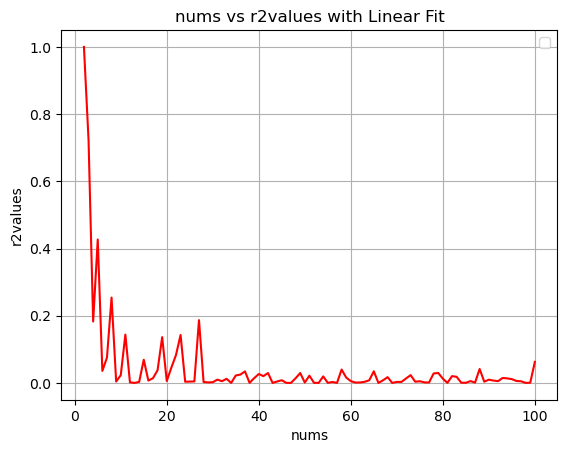

In [35]:
plt.plot(r2values[:, 0], r2values[:, 1], color='red')
plt.xlabel('nums')
plt.ylabel('r2values')
plt.title('nums vs r2values with Linear Fit')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# My dear grandy boy, please do not have concise predictions about situations with a small amount of data. Do not be judgy!
# especially with less data at hand. Conditions can be fit well on small data sets. Be patient wait for the right moment for your decisions